In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons,make_classification,make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

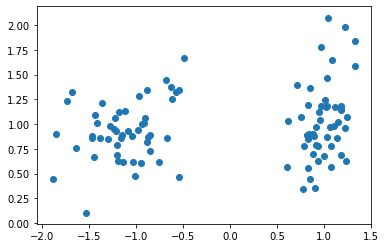

In [14]:
x,y = make_classification(n_samples=100,
                         n_features=2,
                         n_redundant=0,
                         n_informative=2,
                         random_state=1,
                         n_clusters_per_class=1)

plt.scatter(x[:,0],x[:,1])

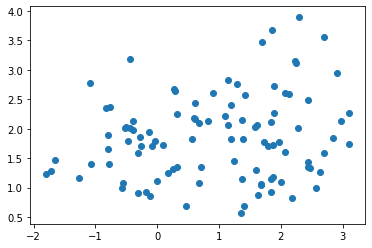

In [15]:
#使x中的数据变得更稀疏
rng = np.random.RandomState(2)
x += 2*rng.uniform(size=x.shape)

plt.scatter(x[:,0],x[:,1])

In [17]:
linear_separable = (x,y)
datasets = [make_moons(noise=0.3,random_state=0),
           make_circles(noise=0.2,factor=0.5,random_state=1),
           linear_separable]

datasets

[(array([[ 0.03159499,  0.98698776],
         [ 2.11509784, -0.04624397],
         [ 0.88248972, -0.07575606],
         [-0.0551441 , -0.03733246],
         [ 0.82954503, -0.53932149],
         [ 2.11285708,  0.66208353],
         [ 0.5696927 ,  0.33744136],
         [ 0.95217454, -0.75307471],
         [-0.02922115,  0.39287336],
         [ 1.71579557,  0.36069454],
         [-0.27883014,  0.61420539],
         [ 2.00344509, -0.3091496 ],
         [ 1.50009616, -0.74636376],
         [ 1.22540835,  1.19793017],
         [ 0.46730819,  0.54703192],
         [-0.36653222,  1.11971633],
         [ 0.30124459,  1.23315697],
         [ 0.30430746,  0.82373935],
         [-0.23712492,  0.77876034],
         [ 1.16339832,  0.55290238],
         [-0.59702417,  0.6572361 ],
         [ 0.46356735, -0.1951543 ],
         [ 0.68451111,  0.75287685],
         [ 0.70515699, -0.45892444],
         [-0.65805008, -0.12944211],
         [-0.74662946, -0.3829632 ],
         [ 0.60585226,  0.31252842],
 

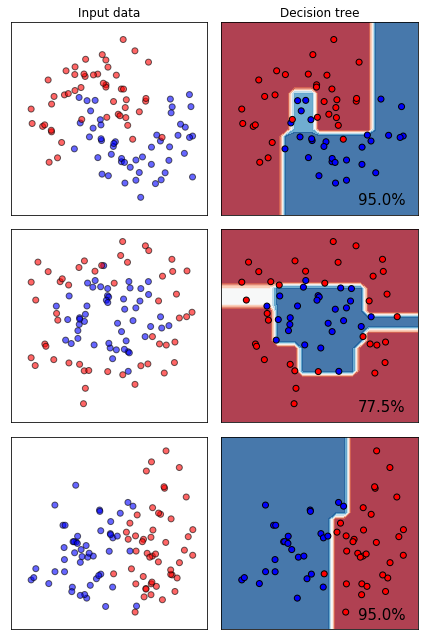

In [35]:
#画出三种数据集数据图像
figure = plt.figure(figsize=(6,9))
i = 1

for ds_index,ds in enumerate(datasets):
    X,Y = ds
    X = StandardScaler().fit_transform(X)
    xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.4,random_state=42)
    
    x1_min,x1_max = X[:,0].min()-0.5,X[:,0].max()+0.5
    x2_min,x2_max = X[:,1].min()-0.5,X[:,1].max()+0.5 #扩大特征值范围
    
    array1,array2 = np.meshgrid(np.arange(x1_min,x1_max,0.2),
                                np.arange(x2_min,x2_max,0.2)) #s生成网格数据
    
    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000','#0000FF']) ##FF0000 正红
    ax = plt.subplot(len(datasets),2,i)
    if ds_index==0:
        ax.set_title('Input data')
    #训练集
    ax.scatter(xtrain[:,0],xtrain[:,1],c=ytrain,cmap=cm_bright,alpha=0.6,edgecolors='k')
    
    #测试集
    ax.scatter(xtest[:,0],xtest[:,1],c=ytest,cmap=cm_bright,alpha=0.6,edgecolors='k')
    
    ax.set_xlim(array1.min(),array1.max())
    ax.set_ylim(array2.min(),array2.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1
    #决策树图像
    ax = plt.subplot(len(datasets),2,i)
    clf = DecisionTreeClassifier(max_depth=5)
    clf = clf.fit(xtrain,ytrain)
    score = clf.score(xtest,ytest)
    
    z = clf.predict_proba(np.c_[array1.ravel(),array2.ravel()])[:,1] #predict_proba返回预测属于某标签的概率  
    #print(z)
    z = z.reshape(array1.shape)
    ax.contourf(array1,array2,z,cmap=cm,alpha=0.8)
    
    ax.scatter(xtrain[:,0],xtrain[:,1],c=ytrain,cmap=cm_bright,edgecolors='k')
    ax.set_xlim(array1.min(),array1.max())
    ax.set_ylim(array2.min(),array2.max())
    ax.set_xticks(())
    ax.set_yticks(())
    if ds_index==0:
        ax.set_title('Decision tree')
        
    #写在右下角的数字
    ax.text(array1.max()-0.3,array2.min()+0.3,('{:.1f}%'.format(score*100)),size=15,
           horizontalalignment='right')
    i +=1
plt.tight_layout()
plt.show()